## Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Create DataFrames

In [ ]:
#Categories list to DF
categories = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FashionRecommendations/CNN/Anno/list_category_cloth.txt', sep='\s{2,}', header=0, skiprows=[0], engine='python')
categories['category_label'] = np.arange(1, len(categories)+1)
categories

category  category_type  category_label
0         탑              1               1
1      블라우스              1               2
2       티셔츠              1               3
3      니트웨어              1               4
4        셔츠              1               5
5       브라탑              1               6
6       후드티              1               7
7       청바지              2               8
8        팬츠              2               9
9       스커트              2              10
10      레깅스              2              11
11     조거팬츠              2              12
12       코트              3              13
13       재킷              3              14
14       점퍼              3              15
15       패딩              3              16
16      베스트              3              17
17      가디건              3              18
18       짚업              3              19
19      드레스              4              20
20     점프수트              4              21

In [ ]:
#Image DF with partition labels (train/val/test)
img_partitions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FashionRecommendations/CNN/Eval/list_eval_partition.csv', sep="\t", header=1, error_bad_lines=False, encoding="euc-kr")
print(img_partitions["evaluation_status"][0])
img_partitions

val


path evaluation_status
0                K-Fashion 이미지/원천데이터/레트로/(121)IMG_1.jpg               val
1                K-Fashion 이미지/원천데이터/레트로/(211)IMG_1.jpg               val
2     K-Fashion 이미지/원천데이터/레트로/018-285-4,257-35,865-H...               val
3     K-Fashion 이미지/원천데이터/레트로/019-286-3,261-39,126-H...             train
4     K-Fashion 이미지/원천데이터/레트로/1-(9)-004-271-3031-516...               val
...                                                 ...               ...
1176  K-Fashion 이미지/원천데이터/레트로/없음-994-994-완-DSC_4876.jpg             train
1177  K-Fashion 이미지/원천데이터/레트로/없음-994-994-완-DSC_4896.jpg             train
1178  K-Fashion 이미지/원천데이터/레트로/없음-994-994-완-DSC_4916.jpg               val
1179  K-Fashion 이미지/원천데이터/레트로/팬츠-1-u_155677953310-00...              test
1180  K-Fashion 이미지/원천데이터/레트로/팬츠-1-u_155677953310-00...             train

[1181 rows x 2 columns]

In [ ]:
#Image DF with category number labels
img_categories = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FashionRecommendations/CNN/Anno/list_img.csv', sep="\t",header=0, skiprows=[0], error_bad_lines=False, encoding="euc-kr")
img_categories

path clothes  ... fit shape
0                K-Fashion 이미지/원천데이터/레트로/(121)IMG_1.jpg      상의  ...  루즈   NaN
1                K-Fashion 이미지/원천데이터/레트로/(211)IMG_1.jpg      상의  ...  노멀   NaN
2     K-Fashion 이미지/원천데이터/레트로/018-285-4,257-35,865-H...     원피스  ...  루즈   NaN
3     K-Fashion 이미지/원천데이터/레트로/019-286-3,261-39,126-H...      상의  ...  노멀   NaN
4     K-Fashion 이미지/원천데이터/레트로/1-(9)-004-271-3031-516...      상의  ...  루즈   NaN
...                                                 ...     ...  ...  ..   ...
1176  K-Fashion 이미지/원천데이터/레트로/없음-994-994-완-DSC_4876.jpg     원피스  ...  노멀   NaN
1177  K-Fashion 이미지/원천데이터/레트로/없음-994-994-완-DSC_4896.jpg     원피스  ...  노멀   NaN
1178  K-Fashion 이미지/원천데이터/레트로/없음-994-994-완-DSC_4916.jpg     원피스  ...  노멀   NaN
1179  K-Fashion 이미지/원천데이터/레트로/팬츠-1-u_155677953310-00...      상의  ...  노멀   NaN
1180  K-Fashion 이미지/원천데이터/레트로/팬츠-1-u_155677953310-00...      하의  ...  노멀   NaN

[1181 rows x 13 columns]

In [ ]:
#Merge category img DF with category label DF 
#Merge image DFs for total DF with category and partition labels

# img_categories = pd.concat([img_categories, categories])
img_categories = pd.merge(img_categories, categories, how='left', on='category' )
total_df = pd.merge(img_categories, img_partitions, how='left', on='path')

total_df

path  ... evaluation_status
0                K-Fashion 이미지/원천데이터/레트로/(121)IMG_1.jpg  ...               val
1                K-Fashion 이미지/원천데이터/레트로/(211)IMG_1.jpg  ...               val
2     K-Fashion 이미지/원천데이터/레트로/018-285-4,257-35,865-H...  ...               val
3     K-Fashion 이미지/원천데이터/레트로/019-286-3,261-39,126-H...  ...             train
4     K-Fashion 이미지/원천데이터/레트로/1-(9)-004-271-3031-516...  ...               val
...                                                 ...  ...               ...
1930  K-Fashion 이미지/원천데이터/레트로/없음-994-994-완-DSC_4916.jpg  ...               val
1931  K-Fashion 이미지/원천데이터/레트로/팬츠-1-u_155677953310-00...  ...              test
1932  K-Fashion 이미지/원천데이터/레트로/팬츠-1-u_155677953310-00...  ...             train
1933  K-Fashion 이미지/원천데이터/레트로/팬츠-1-u_155677953310-00...  ...              test
1934  K-Fashion 이미지/원천데이터/레트로/팬츠-1-u_155677953310-00...  ...             train

[1935 rows x 16 columns]

## EDA and Cleaning Data

In [ ]:
drop_categories = total_df['category'].value_counts().tail(12).index.tolist()

In [ ]:
cleaned_df = total_df.drop(total_df[total_df['category'].isin(drop_categories)].index).copy()

In [ ]:
def drop_list(category, drop_num):
    cat_index = total_df[(total_df['category']== category)&(total_df['evaluation_status'].isin(['train','val']))].index.tolist()
    print(cat_index)
    print(drop_num)
    drop_cat = np.random.choice(cat_index, drop_num, replace=True)
    return drop_cat.tolist()

In [ ]:
drop_dress = drop_list('드레스', 52)
drop_tee = drop_list('티셔츠', 21)
drop_blouse = drop_list('블라우스', 11)
drop_shorts = drop_list('셔츠', 6)
drop_vest = drop_list('베스트', 3)
drop_skirt = drop_list('스커트', 2)

drop_all_cat = drop_dress + drop_tee + drop_blouse + drop_shorts + drop_vest + drop_skirt

[2, 70, 147, 149, 158, 159, 160, 162, 163, 164, 169, 170, 248, 249, 250, 270, 271, 331, 357, 359, 360, 418, 419, 428, 433, 434, 437, 438, 439, 475, 476, 549, 563, 565, 566, 613, 614, 615, 667, 722, 732, 734, 771, 822, 844, 874, 914, 915, 918, 946, 949, 950, 951, 960, 961, 963, 964, 967, 974, 975, 976, 977, 983, 984, 987, 991, 992, 995, 996, 999, 1000, 1015, 1059, 1060, 1063, 1064, 1066, 1072, 1074, 1076, 1080, 1082, 1085, 1086, 1087, 1089, 1098, 1103, 1104, 1139, 1174, 1237, 1270, 1288, 1320, 1325, 1326, 1327, 1328, 1329, 1332, 1333, 1341, 1343, 1344, 1388, 1389, 1392, 1398, 1399, 1400, 1402, 1403, 1404, 1405, 1409, 1410, 1411, 1412, 1472, 1473, 1474, 1487, 1488, 1638, 1641, 1642, 1643, 1644, 1650, 1651, 1665, 1701, 1720, 1823, 1824, 1825, 1826, 1832, 1896, 1902, 1916, 1927, 1928, 1929, 1930]
52
[146, 199, 200, 201, 259, 260, 315, 342, 344, 351, 361, 362, 366, 369, 370, 386, 387, 388, 396, 397, 405, 406, 409, 413, 420, 421, 429, 430, 490, 491, 494, 495, 499, 500, 503, 504, 568, 569, 57

In [ ]:
training_df = cleaned_df[cleaned_df['evaluation_status'].isin(['train','val'])][['name','category']].copy()
#training_df.drop(drop_all_cat, inplace=True)

In [ ]:
training_df['category'].value_counts()
training_df

name category
0                                        (121)IMG_1.jpg     블라우스
1                                        (211)IMG_1.jpg     블라우스
2                 018-285-4,257-35,865-Hanna_409_07.jpg      드레스
4                1-(9)-004-271-3031-5163-TOP_179_11.jpg     블라우스
5          1-(9)-005-272-2,351-7,514-FisrtGI_355_02.jpg     블라우스
...                                                 ...      ...
1927  없음-718-718--k85ops2524(2)-블루샵(대행,루니도트OPS)6.4-1...      드레스
1928                          없음-994-994-완-DSC_4876.jpg      드레스
1929                          없음-994-994-완-DSC_4896.jpg      드레스
1930                          없음-994-994-완-DSC_4916.jpg      드레스
1934                 팬츠-1-u_155677953310-001 (1995).jpg       팬츠

[978 rows x 2 columns]

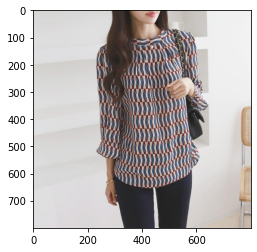

In [ ]:
from matplotlib import image

# load the image
data = image.imread('/content/drive/MyDrive/Colab Notebooks/FashionRecommendations/CNN/K-Fashion 이미지/원천데이터/레트로/1-(9)-004-271-3031-5163-TOP_179_11.jpg')

plt.imshow(data)
plt.show()

## Model Training

In [ ]:
from fastai import *
from fastai.vision import *

np.random.seed(42)
torch.cuda.set_device(0)

### Loading Data

In [ ]:
img_base_path = Path("/content/drive/MyDrive/Colab Notebooks/FashionRecommendations/CNN/K-Fashion 이미지/원천데이터/레트로/")
data = ImageDataBunch.from_df(img_base_path, training_df, ds_tfms=get_transforms(), size=150)
data.normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for deta

ImageDataBunch;

Train: LabelList (783 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: CategoryList
블라우스,블라우스,드레스,블라우스,블라우스
Path: /content/drive/MyDrive/Colab Notebooks/FashionRecommendations/CNN/K-Fashion 이미지/원천데이터/레트로;

Valid: LabelList (195 items)
x: ImageList
Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150),Image (3, 150, 150)
y: CategoryList
티셔츠,블라우스,스커트,티셔츠,드레스
Path: /content/drive/MyDrive/Colab Notebooks/FashionRecommendations/CNN/K-Fashion 이미지/원천데이터/레트로;

Test: None

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

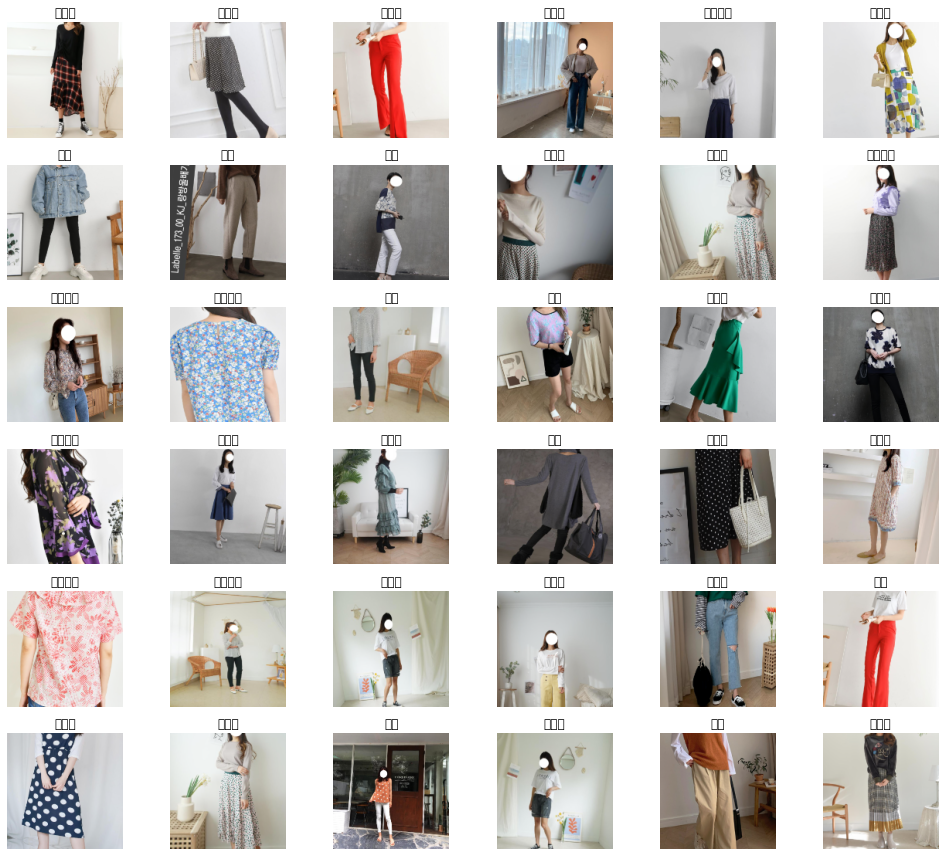

In [ ]:
data.show_batch(rows=6, figsize=(14,12))

In [ ]:
print(data.classes)
len(data.classes),data.c


['드레스', '블라우스', '스커트', '청바지', '티셔츠', '팬츠']


(6, 6)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fit_one_cycle(4)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for i

In [ ]:
learn.save('cat-resnet50-size150-epoch4')

In [ ]:
learn.lr_find()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for i

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


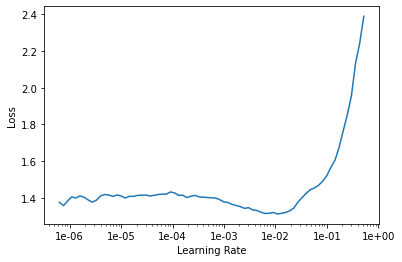

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
learn.export('cat-rn50-size150-fr4-unfr2.pkl')

In [ ]:
learn.freeze()

In [ ]:
learn.fit_one_cycle(4)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

In [ ]:
learn.export('cat-rn50-size150-fr4-unfr2-fr4-unfr4.pkl')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.most_confused(min_val=80)

In [ ]:
def accuracy_topk(output, target, topk=(3,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [ ]:
output, target = learn.get_preds(ds_type=DatasetType.Valid)
accuracy_topk(output, target, topk=(3,))

In [ ]:
predict_img_path = "/data/Michael/data/predict/2.png"
show_image(open_image(predict_img_path))


In [ ]:
category,classIndex,losses = learn.predict(open_image(predict_img_path))
predictions = sorted(zip(data.classes, map(float, losses)), key=lambda p: p[1], reverse=True)
print (predictions[:3])